# Textmining - fivethirtyeight

---

Group name: Group B

---


## Setup

In [1]:
import IPython
assert IPython.version_info[0] >= 3, "Your version of IPython is too old, please update it."

In [2]:
# we suppress some unimportant warnings
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

## Data
### Data import

In [3]:
import pandas as pd

In [4]:
# import articles and save as data frame
df = pd.read_csv("../data/raw/webscraping.csv", sep="|")

### Data corrections

In [5]:
df['article'] = df['article'].astype(str).str.lower()

In [6]:
df

,Unnamed: 0,website,article
0,0,five,...
1,1,wired,skip to main content open navigation menu to r...


# 1 | Text mining
## Data preparation

In [7]:
from nltk.tokenize import RegexpTokenizer

In [8]:
regexp = RegexpTokenizer('\w+')
df['article_token']=df['article'].apply(regexp.tokenize)

In [9]:
df.head()

,Unnamed: 0,website,article,article_token
0,0,five,...,"[skip, to, main, content, fivethirtyeight, sea..."
1,1,wired,skip to main content open navigation menu to r...,"[skip, to, main, content, open, navigation, me..."


### Stopwords

In [10]:
import nltk

# download the stopwords package
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Verena
[nltk_data]     Papsdorf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
import nltk
from nltk.corpus import stopwords

In [12]:
# Make a list of english stopwords
stopwords = nltk.corpus.stopwords.words("english")

In [13]:
# make your own custom stopwords
my_stopwords = ['https', 'co']

In [14]:
# Extend the stopword list with your own custom stopwords
stopwords.extend(my_stopwords)

In [15]:
df['article_token_s'] = df['article_token'].apply(lambda x: [i for i in x if i not in stopwords])

In [16]:
df.head(3)

,Unnamed: 0,website,article,article_token,article_token_s
0,0,five,...,"[skip, to, main, content, fivethirtyeight, sea...","[skip, main, content, fivethirtyeight, search,..."
1,1,wired,skip to main content open navigation menu to r...,"[skip, to, main, content, open, navigation, me...","[skip, main, content, open, navigation, menu, ..."


### Transform data and remove infrequent words

In [17]:
df['article_si'] = df['article_token_s'].apply(lambda x: ' '.join([i for i in x if len(i)>2]))

In [18]:
df

,Unnamed: 0,website,article,article_token,article_token_s,article_si
0,0,five,...,"[skip, to, main, content, fivethirtyeight, sea...","[skip, main, content, fivethirtyeight, search,...",skip main content fivethirtyeight search searc...
1,1,wired,skip to main content open navigation menu to r...,"[skip, to, main, content, open, navigation, me...","[skip, main, content, open, navigation, menu, ...",skip main content open navigation menu revist ...


### Lemmatization

In [19]:
# we need to download some packages
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to C:\Users\Verena
[nltk_data]     Papsdorf\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Verena
[nltk_data]     Papsdorf\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [20]:
from nltk.stem import WordNetLemmatizer

In [21]:
# create an object called wordnet_lem of the WordNetLemmatizer() function.
wordnet_lem = WordNetLemmatizer()

In [22]:
# create a new column (l for lemmatization) and apply the function .lemmatize
df['article_sil'] = df['article_si'].apply(wordnet_lem.lemmatize)

In [23]:
# we check wether there are any differences in the two columns
check_difference = (df['article_sil'] == df['article_si'])

# sum all True and False values
check_difference.value_counts()

True    2
dtype: int64

In [24]:
df

,Unnamed: 0,website,article,article_token,article_token_s,article_si,article_sil
0,0,five,...,"[skip, to, main, content, fivethirtyeight, sea...","[skip, main, content, fivethirtyeight, search,...",skip main content fivethirtyeight search searc...,skip main content fivethirtyeight search searc...
1,1,wired,skip to main content open navigation menu to r...,"[skip, to, main, content, open, navigation, me...","[skip, main, content, open, navigation, menu, ...",skip main content open navigation menu revist ...,skip main content open navigation menu revist ...


In [25]:
# only fivethirtyeight article
df_fte = df.iloc[0]
df_fte

Unnamed: 0                                                         0
website                                                         five
article                                                          ...
article_token      [skip, to, main, content, fivethirtyeight, sea...
article_token_s    [skip, main, content, fivethirtyeight, search,...
article_si         skip main content fivethirtyeight search searc...
article_sil        skip main content fivethirtyeight search searc...
Name: 0, dtype: object

## Data visualization

In [26]:
all_words = df_fte['article_sil']

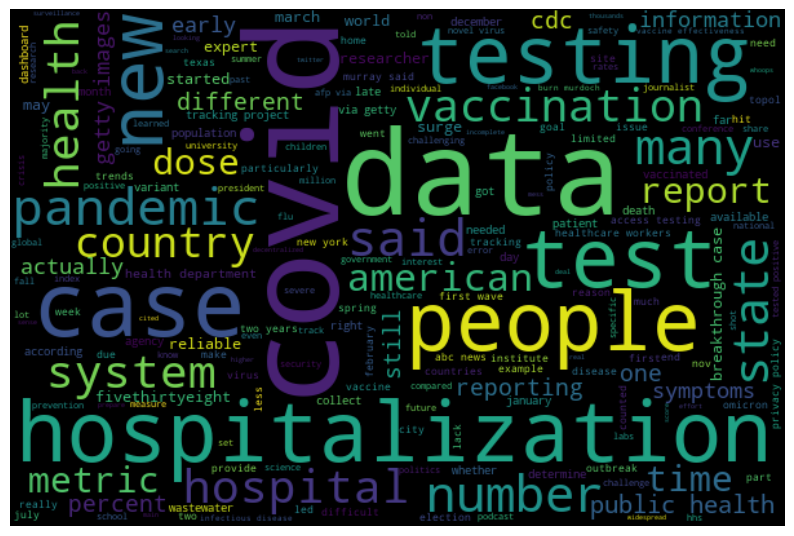

In [27]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show;

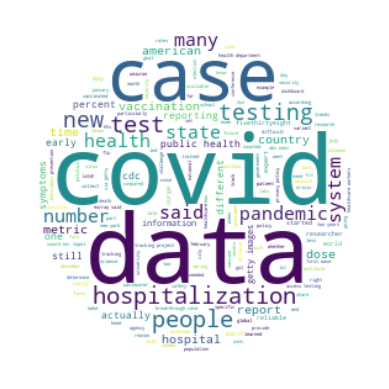

In [28]:
import numpy as np

x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(background_color="white", repeat=True, mask=mask)
wc.generate(all_words)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show;

### Frequency distributions

In [29]:
# download the package
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Verena
[nltk_data]     Papsdorf\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [30]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [31]:
# tokenize the words
words_tokens = nltk.word_tokenize(all_words)

In [32]:
# use the function FreqDist and save the result as fd
fd = FreqDist(words_tokens)

In [33]:
fd

FreqDist({'covid': 47, 'data': 39, 'health': 26, 'testing': 22, 'people': 19, 'new': 18, '2022': 17, '2020': 17, 'said': 17, 'cases': 14, ...})

### Most common words

In [34]:
# find the 3 most common words
top_3 = fd.most_common(n=3)

top_3

[('covid', 47), ('data', 39), ('health', 26)]

In [35]:
# show the 3 most common words as table
fd.tabulate(3)

 covid   data health 
    47     39     26 


### Plot common words

In [36]:
# Obtain top 10 words
top_10 = fd.most_common(10)

top_10

[('covid', 47),
 ('data', 39),
 ('health', 26),
 ('testing', 22),
 ('people', 19),
 ('new', 18),
 ('2022', 17),
 ('2020', 17),
 ('said', 17),
 ('cases', 14)]

In [37]:
# make a pandas datframe from the dictionary
df_dist = pd.DataFrame({"value": dict(top_10)})

df_dist

,value
2020,17
2022,17
cases,14
covid,47
data,39
health,26
new,18
people,19
said,17
testing,22


In [38]:
# reset index to transform index to column
df_dist.reset_index(inplace=True)

df_dist

,index,value
0,2020,17
1,2022,17
2,cases,14
3,covid,47
4,data,39
5,health,26
6,new,18
7,people,19
8,said,17
9,testing,22


In [39]:
import altair as alt

alt.Chart(df_dist).mark_bar().encode(
    x=alt.X("value"),
    y=alt.Y("index", sort="-x")
)

alt.Chart(...)

### Search specific words

In [40]:
# Show frequency of a specific word
fd["election"]

4

# 2 | Sentiment analysis

In [41]:
import nltk

# we suppress some unimportant warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Analysis

In [42]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Verena
[nltk_data]     Papsdorf\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [43]:
from nltk.sentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

In [44]:
# polarity score
df['polarity'] = df['article_sil'].apply(lambda x: analyzer.polarity_scores(x))

In [45]:
# Change data structure (we unnest the column polarity and add new columns)
df = pd.concat([df.drop(['polarity'], axis=1), df['polarity'].apply(pd.Series)], axis=1)

In [46]:
df['sentiment'] = df['compound'].apply(lambda x: 'positive' if x > 0 else 'neutral' if x == 0 else 'negative')

In [47]:
df_fte = df.iloc[0]
df_fte

Unnamed: 0                                                         0
website                                                         five
article                                                          ...
article_token      [skip, to, main, content, fivethirtyeight, sea...
article_token_s    [skip, main, content, fivethirtyeight, search,...
article_si         skip main content fivethirtyeight search searc...
article_sil        skip main content fivethirtyeight search searc...
neg                                                            0.072
neu                                                            0.825
pos                                                            0.103
compound                                                      0.9956
sentiment                                                   positive
Name: 0, dtype: object

In [48]:
print("The fivethirtyeight article has a compound of {}. The overall sentiment is {}".format(df_fte["compound"], df_fte["sentiment"]))

The fivethirtyeight article has a compound of 0.9956. The overall sentiment is positive


# Saving data frame as csv file

In [49]:
df_fte.to_csv("../data/processed/textmining-clean-FIVETHIRTYEIGHT.csv", index=None)